Complete all the following questions: -

1. Gather and prepare data: Gather and prepare the data you will use to train the model. This may involve collecting data from various sources, do EDA, cleaning and formatting the data, feature selection, encoding, and splitting it into training, validation, and testing sets.

2. Check distribution of the data, outliers and missing value treatment.

3. Choose a model: Use AdaBoost Algorithm.

4. Train the model: You'll need to train it using the data you collected and prepared in step 2. This involves feeding the data into the model and adjusting the model's parameters until it produces accurate results.

5. Evaluate the model: After training the model, you'll need to evaluate its performance using the validation and testing sets. This will help you determine how well the model is able to generalize to new data and whether it is overfitting or underfitting.

6. Fine-tune the model: Based on the results of the evaluation, you may need to fine-tune the model by adjusting the model's parameters, selecting different features, or using a different model architecture.

# <center>**Assignment-7**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data.csv')
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
df.isna().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [6]:
df.nunique()

Bankrupt?                                                      2
 ROA(C) before interest and depreciation before interest    3333
 ROA(A) before interest and % after tax                     3151
 ROA(B) before interest and depreciation after tax          3160
 Operating Gross Margin                                     3781
                                                            ... 
 Liability to Equity                                        6819
 Degree of Financial Leverage (DFL)                         6240
 Interest Coverage Ratio (Interest expense to EBIT)         6240
 Net Income Flag                                               1
 Equity to Liability                                        6819
Length: 96, dtype: int64

In [7]:
df.corr()

Bankrupt?  \
Bankrupt?                                            1.000000   
 ROA(C) before interest and depreciation before...  -0.260807   
 ROA(A) before interest and % after tax             -0.282941   
 ROA(B) before interest and depreciation after tax  -0.273051   
 Operating Gross Margin                             -0.100043   
...                                                       ...   
 Liability to Equity                                 0.166812   
 Degree of Financial Leverage (DFL)                  0.010508   
 Interest Coverage Ratio (Interest expense to E...  -0.005509   
 Net Income Flag                                          NaN   
 Equity to Liability                                -0.083048   

                                                     ROA(C) before interest and depreciation before interest  \
Bankrupt?                                                                                   -0.260807          
 ROA(C) before interest and depreciation before...                                           1.000000          
 ROA(A) before interest and % after tax                                                      0.940124          
 ROA(B) before interest and depreciation after tax                                           0.986849          
 Operating Gross Margin                                                                      0.334719          
...                                                                                               ...          
 Liability to Equity                                                                        -0.143629          
 Degree of Financial Leverage (DFL)                                                         -0.016575          
 Interest Coverage Ratio (Interest expense to E...                                           0.010573          
 Net Income Flag                                                                                  NaN          
 Equity to Liability                                                                         0.052416          

                                                     ROA(A) before interest and % after tax  \
Bankrupt?                                                                         -0.282941   
 ROA(C) before interest and depreciation before...                                 0.940124   
 ROA(A) before interest and % after tax                                            1.000000   
 ROA(B) before interest and depreciation after tax                                 0.955741   
 Operating Gross Margin                                                            0.326969   
...                                                                                     ...   
 Liability to Equity                                                              -0.141039   
 Degree of Financial Leverage (DFL)                                               -0.011515   
 Interest Coverage Ratio (Interest expense to E...                                 0.013372   
 Net Income Flag                                                                        NaN   
 Equity to Liability                                                               0.057887   

                                                     ROA(B) before interest and depreciation after tax  \
Bankrupt?                                                                                   -0.273051    
 ROA(C) before interest and depreciation before...                                           0.986849    
 ROA(A) before interest and % after tax                                                      0.955741    
 ROA(B) before interest and depreciation after tax                                           1.000000    
 Operating Gross Margin                                                                      0.333749    
...                                                                                               ...    
 Liability to Equity                       

In [8]:
x = df.drop("Bankrupt?", axis=1)
y = df["Bankrupt?"]

In [9]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel

# Initialize an AdaBoost classifier
adaboost = AdaBoostClassifier()

# Train the AdaBoost model
adaboost.fit(x, y)

# Perform feature selection using feature importance
feature_importances = adaboost.feature_importances_
selector = SelectFromModel(adaboost, threshold='median')
x_new = selector.fit_transform(x, y)

# Get the selected feature names
selected_feature_names = x.columns[selector.get_support(indices=True)].tolist()

# Print the selected features
print("Selected features: ", selected_feature_names)

Selected features:  [' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate', ' Continuous Net Profit 

In [10]:
len(selected_feature_names)

95

<BarContainer object of 95 artists>

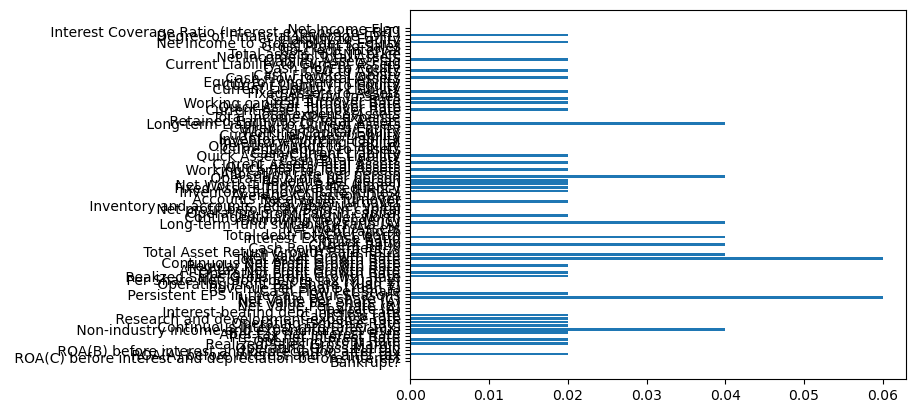

In [11]:
plt.barh(df.columns[0:95],feature_importances)

In [12]:
new_features = []
j=-1
for i in selected_feature_names:
    j=j+1
    if feature_importances[j]>0:
        new_features.append(i) 

In [13]:
new_features

[' ROA(B) before interest and depreciation after tax',
 ' Operating Profit Rate',
 ' Pre-tax net Interest Rate',
 ' Non-industry income and expenditure/revenue',
 ' Continuous interest rate (after tax)',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Cash flow rate',
 ' Interest-bearing debt interest rate',
 ' Persistent EPS in the Last Four Seasons',
 ' Cash Flow Per Share',
 ' Operating Profit Growth Rate',
 ' After-tax Net Profit Growth Rate',
 ' Continuous Net Profit Growth Rate',
 ' Net Value Growth Rate',
 ' Total Asset Return Growth Rate Ratio',
 ' Quick Ratio',
 ' Total debt/Total net worth',
 ' Borrowing dependency',
 ' Operating profit/Paid-in capital',
 ' Accounts Receivable Turnover',
 ' Fixed Assets Turnover Frequency',
 ' Net Worth Turnover Rate (times)',
 ' Revenue per person',
 ' Operating profit per person',
 ' Allocation rate per person',
 ' Quick Assets/Total Assets',
 ' Cash/Total Assets',
 ' Cash/Current Liability',
 ' Retained Earnings t

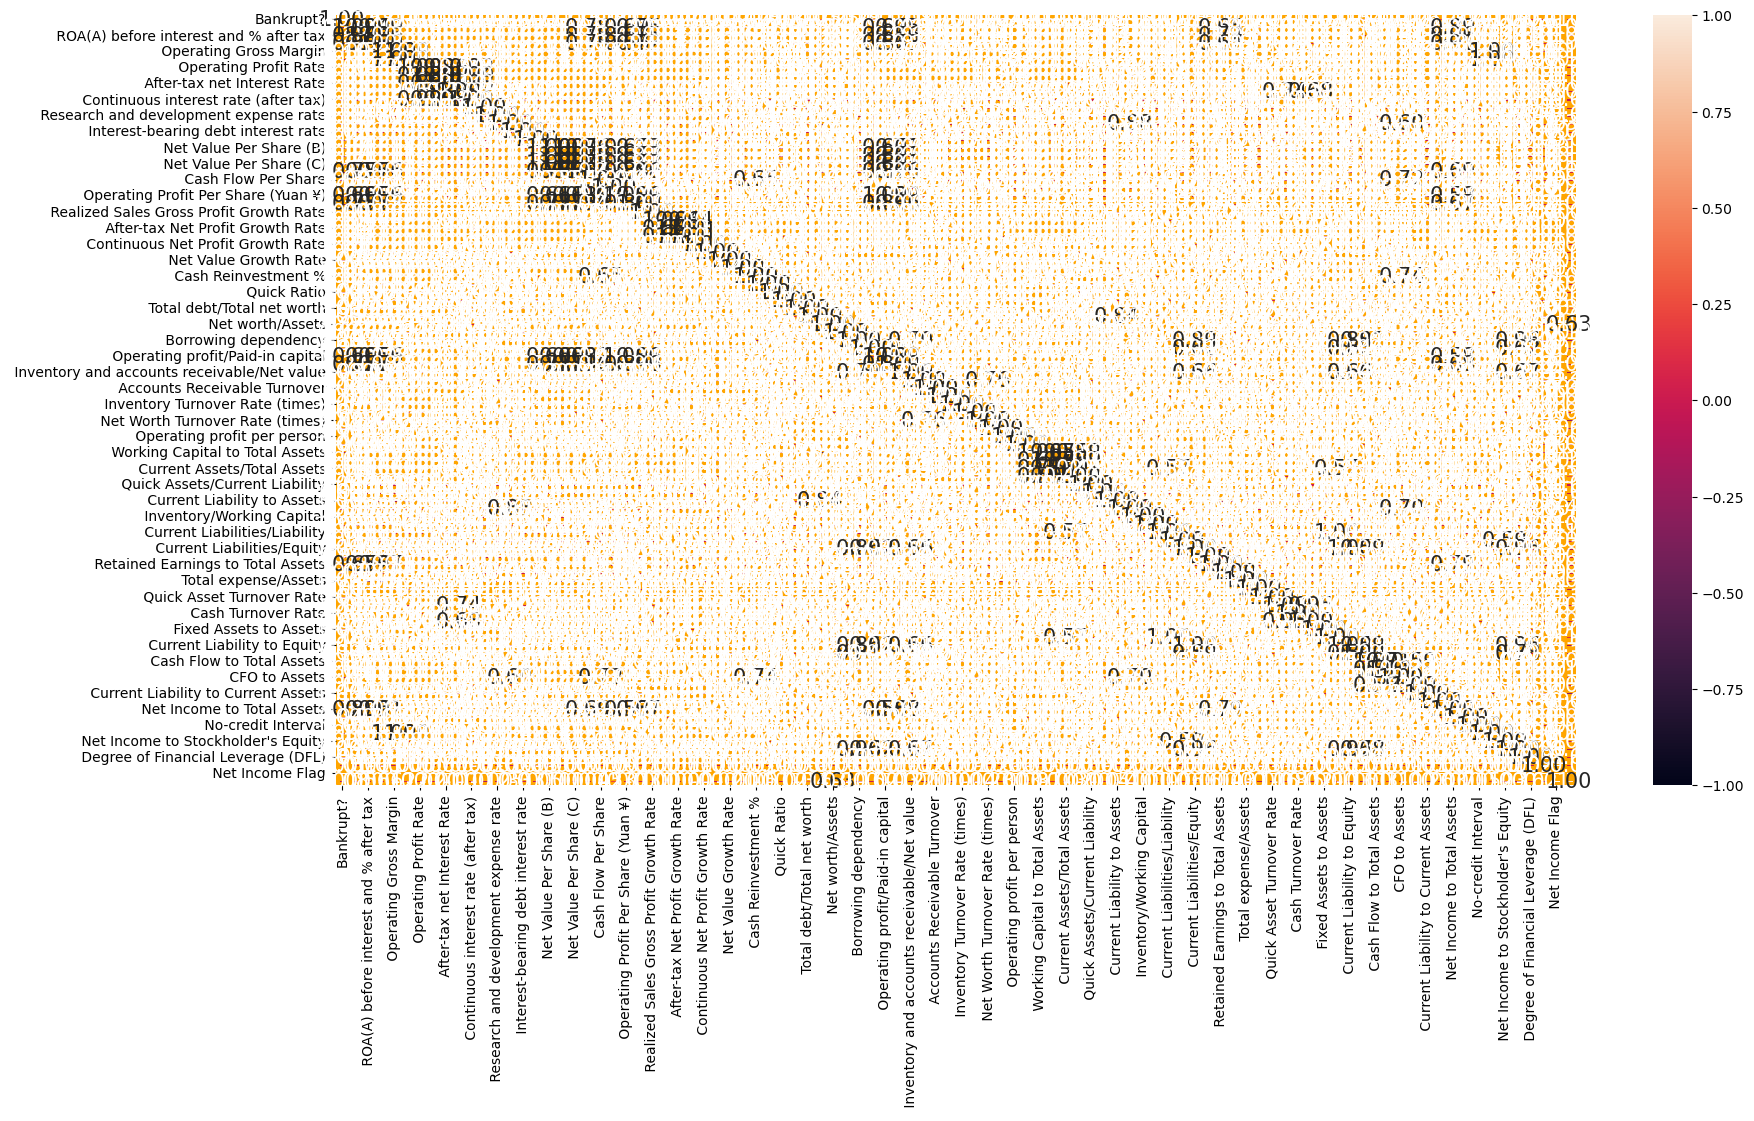

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", annot_kws = {'size' : 15}, linewidth = 5, linecolor = 'orange')
plt.show()

In [14]:
len(new_features)

39

In [14]:
new_x = df[np.array(new_features)]
new_x.head(2)

ROA(B) before interest and depreciation after tax   Operating Profit Rate  \
0                                            0.40575                 0.998969   
1                                            0.51673                 0.998946   

    Pre-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                    0.796887                                      0.302646   
1                    0.797380                                      0.303556   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.780985                 0.000126   
1                               0.781506                 0.000290   

    Research and development expense rate   Cash flow rate  \
0                                     0.0         0.458143   
1                                     0.0         0.461867   

    Interest-bearing debt interest rate  \
0                              0.000725   
1                              0.000647   

    Persistent EPS in the Last Four Seasons  ...  \
0                                  0.169141  ...   
1                                  0.208944  ...   

    Retained Earnings to Total Assets   Quick Asset Turnover Rate  \
0                            0.903225                6.550000e+09   
1                            0.931065                7.700000e+09   

    Cash Turnover Rate   Cash Flow to Sales   Current Liability to Liability  \
0         4.580000e+08             0.671568                         0.676269   
1         2.490000e+09             0.671570                         0.308589   

    Cash Flow to Liability   Cash Flow to Equity   Net Income to Total Assets  \
0                 0.458609              0.312905                     0.716845   
1                 0.459001              0.314163                     0.795297   

    Liability to Equity   Interest Coverage Ratio (Interest expense to EBIT)  
0              0.290202                                           0.564050    
1              0.283846                                           0.570175    

[2 rows x 39 columns]

In [15]:
new_df = new_x.copy()
new_df["Bankrupt?"] = df["Bankrupt?"]
new_df.head(2)

ROA(B) before interest and depreciation after tax   Operating Profit Rate  \
0                                            0.40575                 0.998969   
1                                            0.51673                 0.998946   

    Pre-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                    0.796887                                      0.302646   
1                    0.797380                                      0.303556   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.780985                 0.000126   
1                               0.781506                 0.000290   

    Research and development expense rate   Cash flow rate  \
0                                     0.0         0.458143   
1                                     0.0         0.461867   

    Interest-bearing debt interest rate  \
0                              0.000725   
1                              0.000647   

    Persistent EPS in the Last Four Seasons  ...   Quick Asset Turnover Rate  \
0                                  0.169141  ...                6.550000e+09   
1                                  0.208944  ...                7.700000e+09   

    Cash Turnover Rate   Cash Flow to Sales   Current Liability to Liability  \
0         4.580000e+08             0.671568                         0.676269   
1         2.490000e+09             0.671570                         0.308589   

    Cash Flow to Liability   Cash Flow to Equity   Net Income to Total Assets  \
0                 0.458609              0.312905                     0.716845   
1                 0.459001              0.314163                     0.795297   

    Liability to Equity   Interest Coverage Ratio (Interest expense to EBIT)  \
0              0.290202                                           0.564050     
1              0.283846                                           0.570175     

   Bankrupt?  
0          1  
1          1  

[2 rows x 40 columns]

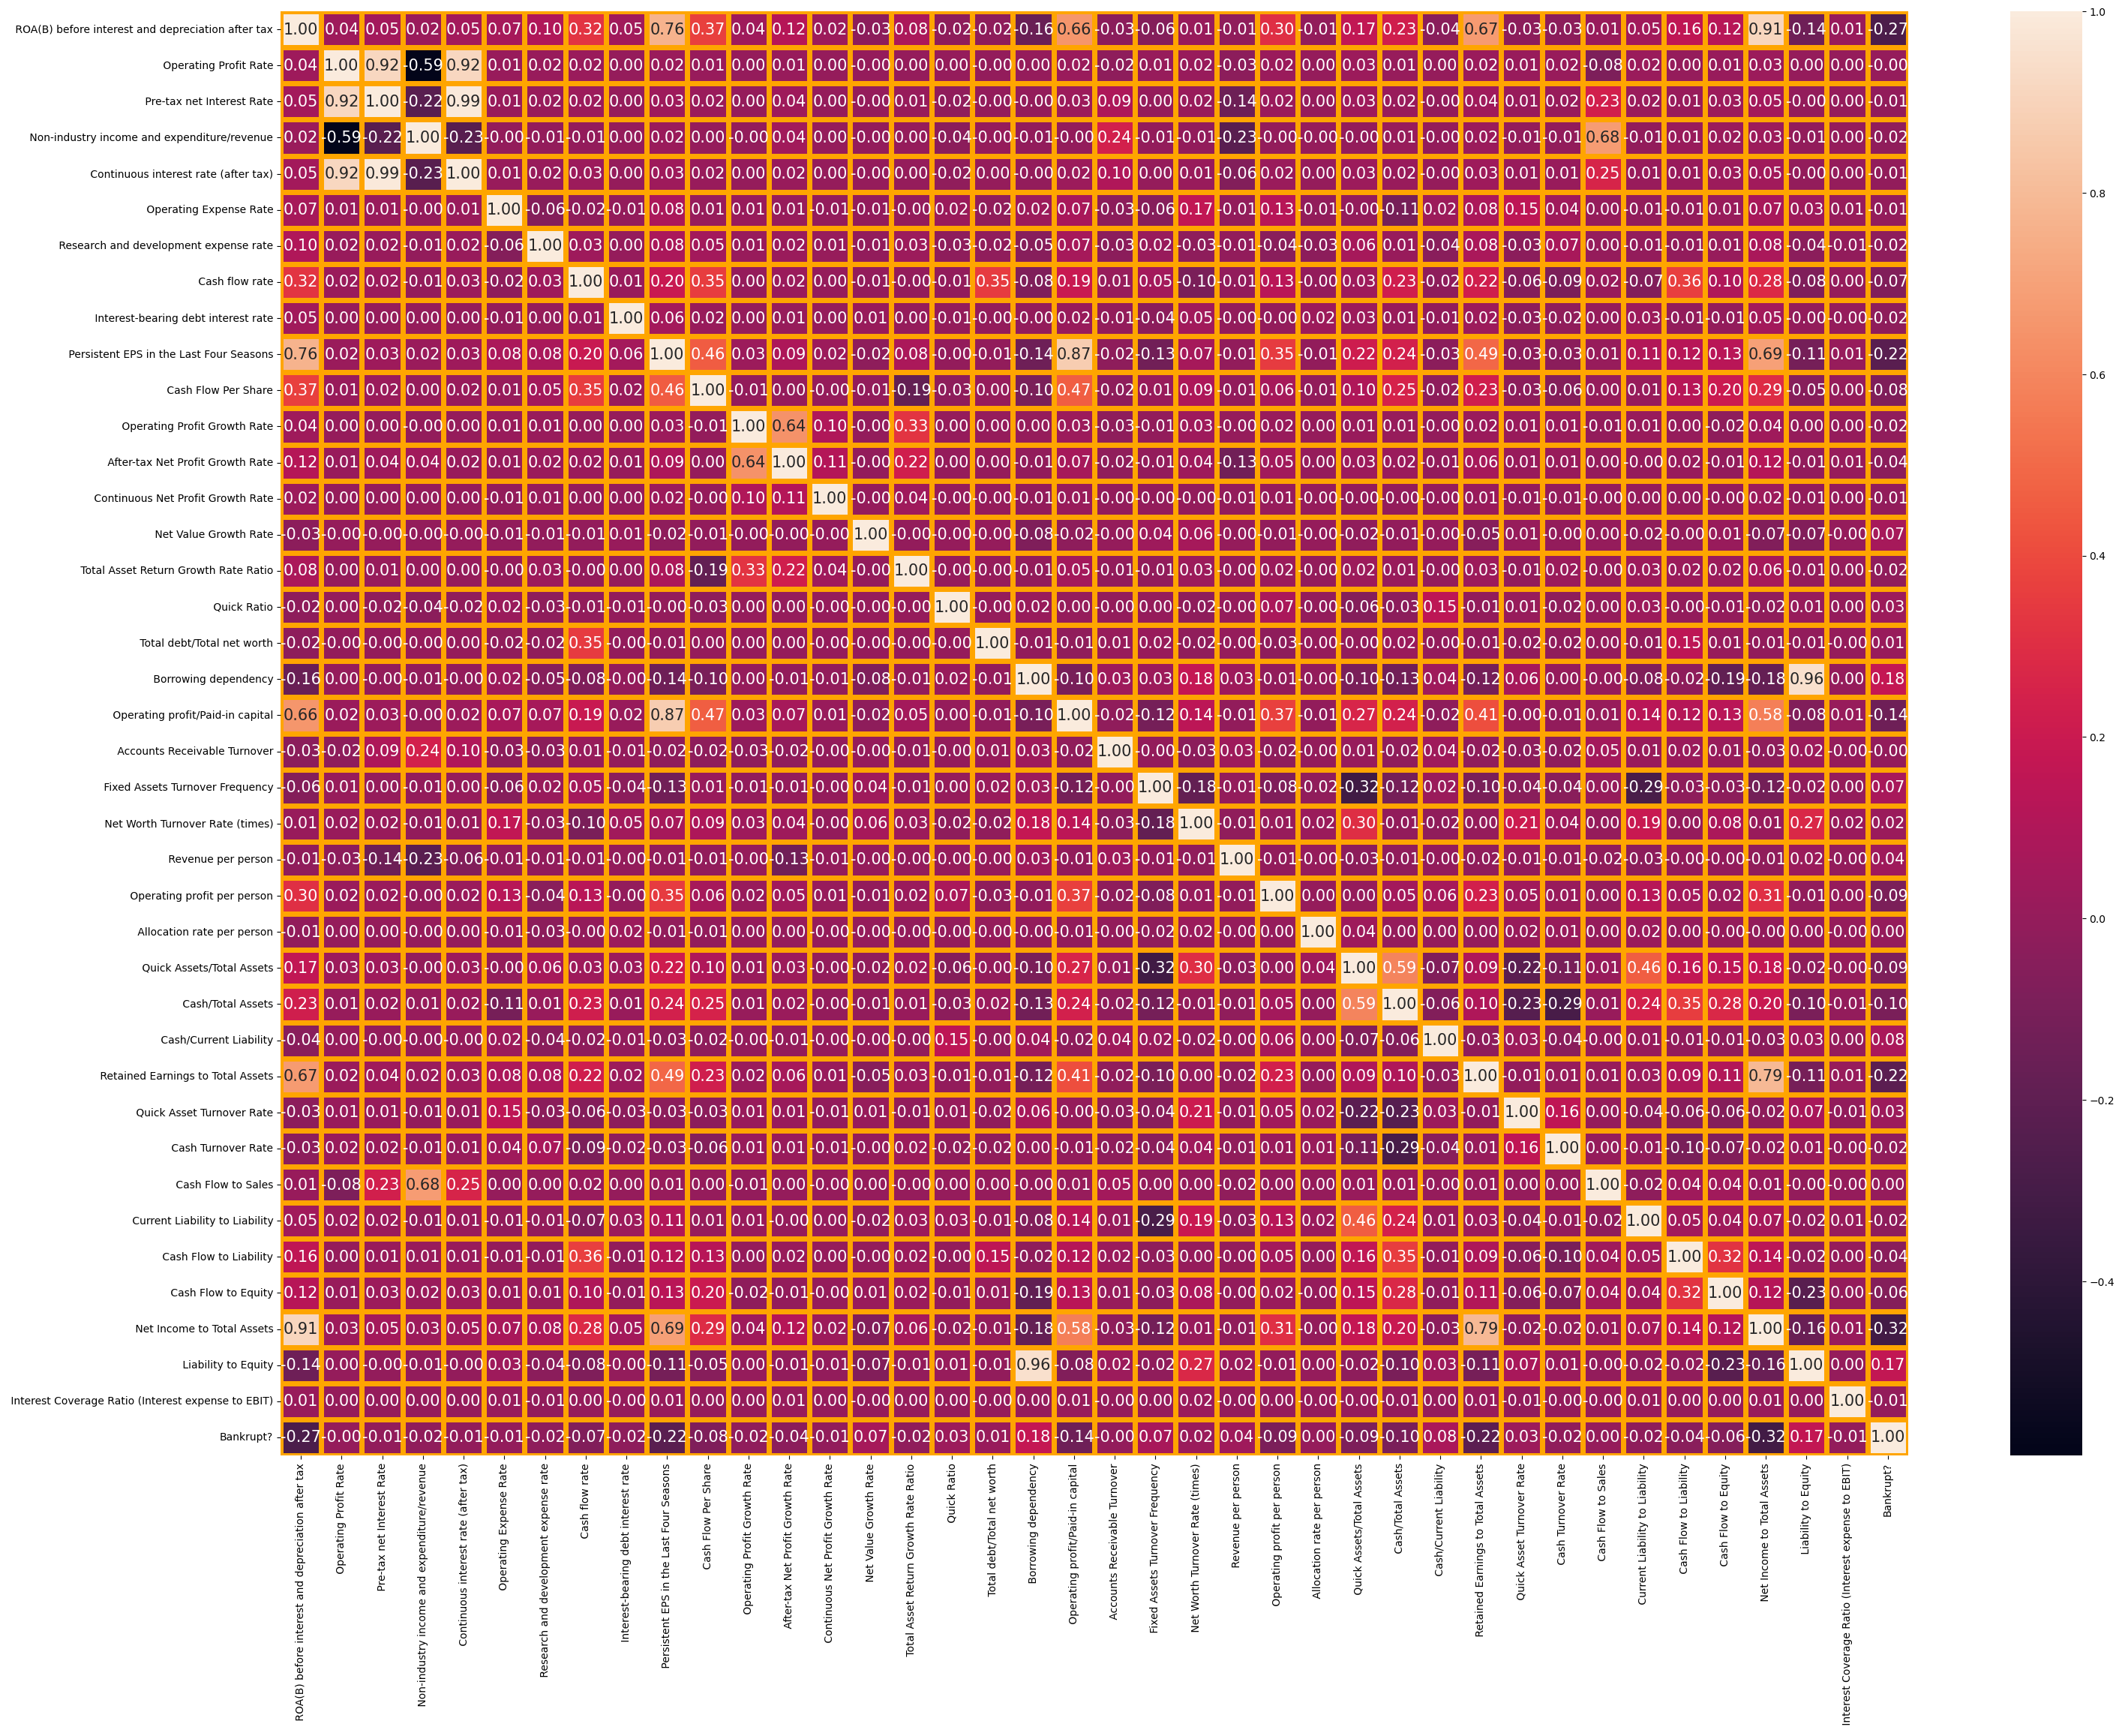

In [17]:
plt.figure(figsize=(35,25))
sns.heatmap(new_df.corr(), annot=True, fmt=".2f", annot_kws = {'size' : 15}, linewidth = 5, linecolor = 'orange')
plt.show()

In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 40 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0    ROA(B) before interest and depreciation after tax   6819 non-null   float64
 1    Operating Profit Rate                               6819 non-null   float64
 2    Pre-tax net Interest Rate                           6819 non-null   float64
 3    Non-industry income and expenditure/revenue         6819 non-null   float64
 4    Continuous interest rate (after tax)                6819 non-null   float64
 5    Operating Expense Rate                              6819 non-null   float64
 6    Research and development expense rate               6819 non-null   float64
 7    Cash flow rate                                      6819 non-null   float64
 8    Interest-bearing debt interest rate                 6819 non-null  

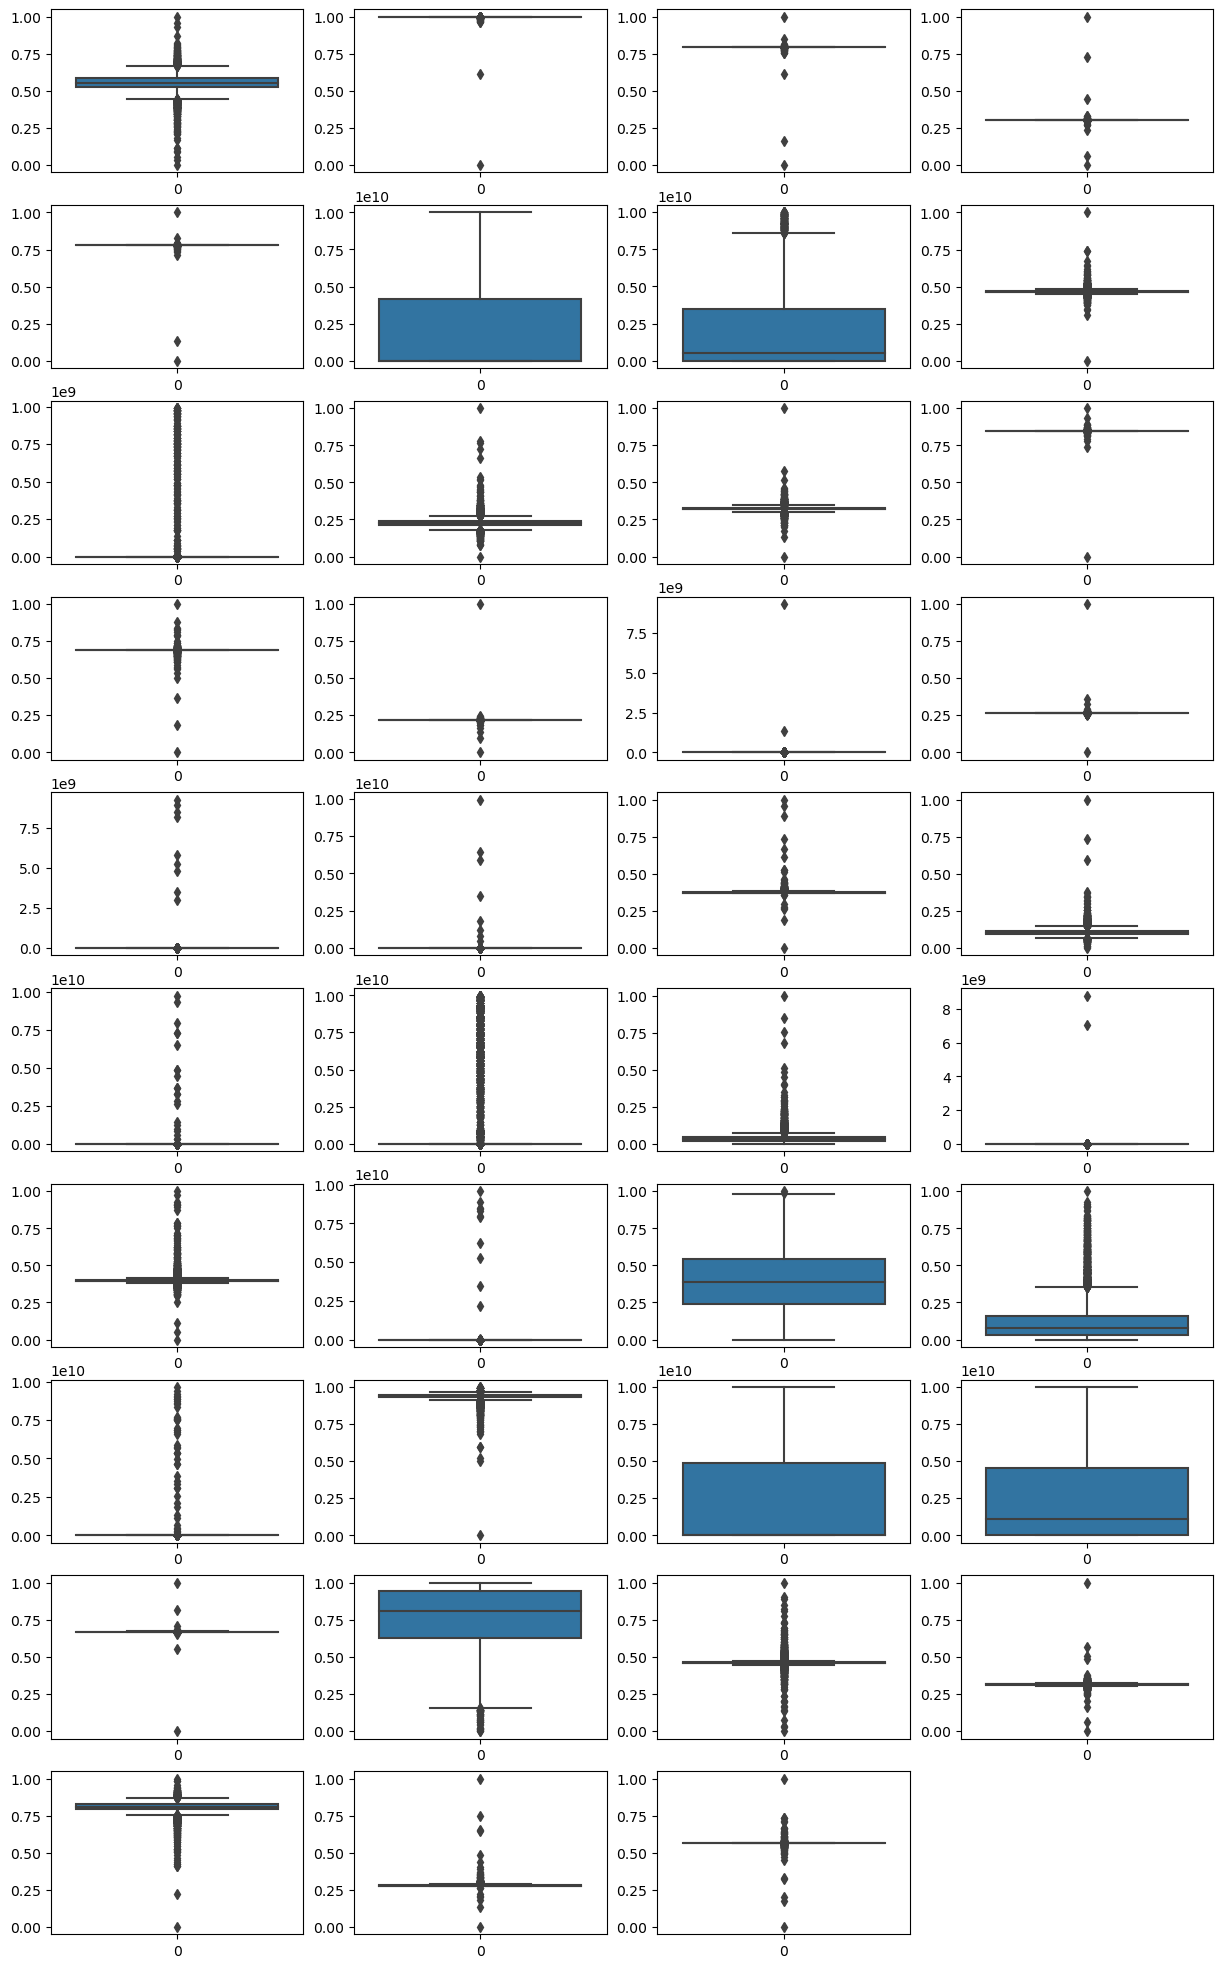

In [22]:
#check for outliers

plt.figure(figsize=(15,25))
x=1
for i in new_x.columns:
    plt.subplot(10,4,x)
    sns.boxplot(new_df[i])
    x+=1
plt.show()

In [120]:
col_names = []
for i in new_df.columns:
    i=i.lstrip()
    i=i.replace(" ","_")
    i=i.replace("-","_")
    i=i.replace("(","")
    i=i.replace(")","")
    i=i.replace("/","_per_")
    col_names.append(i)

col_names

['ROAB_before_interest_and_depreciation_after_tax',
 'Operating_Profit_Rate',
 'Pre_tax_net_Interest_Rate',
 'Non_industry_income_and_expenditure_per_revenue',
 'Continuous_interest_rate_after_tax',
 'Operating_Expense_Rate',
 'Research_and_development_expense_rate',
 'Cash_flow_rate',
 'Interest_bearing_debt_interest_rate',
 'Persistent_EPS_in_the_Last_Four_Seasons',
 'Cash_Flow_Per_Share',
 'Operating_Profit_Growth_Rate',
 'After_tax_Net_Profit_Growth_Rate',
 'Continuous_Net_Profit_Growth_Rate',
 'Net_Value_Growth_Rate',
 'Total_Asset_Return_Growth_Rate_Ratio',
 'Quick_Ratio',
 'Total_debt_per_Total_net_worth',
 'Borrowing_dependency',
 'Operating_profit_per_Paid_in_capital',
 'Accounts_Receivable_Turnover',
 'Fixed_Assets_Turnover_Frequency',
 'Net_Worth_Turnover_Rate_times',
 'Revenue_per_person',
 'Operating_profit_per_person',
 'Allocation_rate_per_person',
 'Quick_Assets_per_Total_Assets',
 'Cash_per_Total_Assets',
 'Cash_per_Current_Liability',
 'Retained_Earnings_to_Total_Asse

In [121]:
col_x = []
for i in new_x.columns:
    i=i.lstrip()
    i=i.replace(" ","_")
    i=i.replace("-","_")
    i=i.replace("(","")
    i=i.replace(")","")
    i=i.replace("/","_per_")
    col_x.append(i)

col_x

['ROAB_before_interest_and_depreciation_after_tax',
 'Operating_Profit_Rate',
 'Pre_tax_net_Interest_Rate',
 'Non_industry_income_and_expenditure_per_revenue',
 'Continuous_interest_rate_after_tax',
 'Operating_Expense_Rate',
 'Research_and_development_expense_rate',
 'Cash_flow_rate',
 'Interest_bearing_debt_interest_rate',
 'Persistent_EPS_in_the_Last_Four_Seasons',
 'Cash_Flow_Per_Share',
 'Operating_Profit_Growth_Rate',
 'After_tax_Net_Profit_Growth_Rate',
 'Continuous_Net_Profit_Growth_Rate',
 'Net_Value_Growth_Rate',
 'Total_Asset_Return_Growth_Rate_Ratio',
 'Quick_Ratio',
 'Total_debt_per_Total_net_worth',
 'Borrowing_dependency',
 'Operating_profit_per_Paid_in_capital',
 'Accounts_Receivable_Turnover',
 'Fixed_Assets_Turnover_Frequency',
 'Net_Worth_Turnover_Rate_times',
 'Revenue_per_person',
 'Operating_profit_per_person',
 'Allocation_rate_per_person',
 'Quick_Assets_per_Total_Assets',
 'Cash_per_Total_Assets',
 'Cash_per_Current_Liability',
 'Retained_Earnings_to_Total_Asse

In [122]:
old_col = new_x.columns
x_col = {}
j=0
for i in col_x:
    x_col.update({old_col[j]:i})
    j=j+1
x_col

{'ROA(B)_before_interest_and_depreciation_after_tax': 'ROAB_before_interest_and_depreciation_after_tax',
 'Operating_Profit_Rate': 'Operating_Profit_Rate',
 'Pre-tax_net_Interest_Rate': 'Pre_tax_net_Interest_Rate',
 'Non-industry_income_and_expenditure/revenue': 'Non_industry_income_and_expenditure_per_revenue',
 'Continuous_interest_rate_(after_tax)': 'Continuous_interest_rate_after_tax',
 'Operating_Expense_Rate': 'Operating_Expense_Rate',
 'Research_and_development_expense_rate': 'Research_and_development_expense_rate',
 'Cash_flow_rate': 'Cash_flow_rate',
 'Interest-bearing_debt_interest_rate': 'Interest_bearing_debt_interest_rate',
 'Persistent_EPS_in_the_Last_Four_Seasons': 'Persistent_EPS_in_the_Last_Four_Seasons',
 'Cash_Flow_Per_Share': 'Cash_Flow_Per_Share',
 'Operating_Profit_Growth_Rate': 'Operating_Profit_Growth_Rate',
 'After-tax_Net_Profit_Growth_Rate': 'After_tax_Net_Profit_Growth_Rate',
 'Continuous_Net_Profit_Growth_Rate': 'Continuous_Net_Profit_Growth_Rate',
 'Net_Va

In [123]:
old_col = new_df.columns
df_col = {}
j=0
for i in col_names:
    df_col.update({old_col[j]:i})
    j=j+1
df_col

{'ROA(B)_before_interest_and_depreciation_after_tax': 'ROAB_before_interest_and_depreciation_after_tax',
 'Operating_Profit_Rate': 'Operating_Profit_Rate',
 'Pre-tax_net_Interest_Rate': 'Pre_tax_net_Interest_Rate',
 'Non-industry_income_and_expenditure/revenue': 'Non_industry_income_and_expenditure_per_revenue',
 'Continuous_interest_rate_(after_tax)': 'Continuous_interest_rate_after_tax',
 'Operating_Expense_Rate': 'Operating_Expense_Rate',
 'Research_and_development_expense_rate': 'Research_and_development_expense_rate',
 'Cash_flow_rate': 'Cash_flow_rate',
 'Interest-bearing_debt_interest_rate': 'Interest_bearing_debt_interest_rate',
 'Persistent_EPS_in_the_Last_Four_Seasons': 'Persistent_EPS_in_the_Last_Four_Seasons',
 'Cash_Flow_Per_Share': 'Cash_Flow_Per_Share',
 'Operating_Profit_Growth_Rate': 'Operating_Profit_Growth_Rate',
 'After-tax_Net_Profit_Growth_Rate': 'After_tax_Net_Profit_Growth_Rate',
 'Continuous_Net_Profit_Growth_Rate': 'Continuous_Net_Profit_Growth_Rate',
 'Net_Va

In [124]:
new_x = new_x.rename(columns=x_col)
new_x

ROAB_before_interest_and_depreciation_after_tax  Operating_Profit_Rate  \
0                                            0.405750               0.998969   
1                                            0.516730               0.998946   
2                                            0.472295               0.998857   
3                                            0.457733               0.998700   
4                                            0.522298               0.998973   
...                                               ...                    ...   
6814                                         0.543230               0.998992   
6815                                         0.524172               0.998992   
6816                                         0.520638               0.998984   
6817                                         0.554045               0.999074   
6818                                         0.549548               0.998080   

      Pre_tax_net_Interest_Rate  \
0                      0.796887   
1                      0.797380   
2                      0.796403   
3                      0.796967   
4                      0.797366   
...                         ...   
6814                   0.797409   
6815                   0.797414   
6816                   0.797401   
6817                   0.797500   
6818                   0.801987   

      Non_industry_income_and_expenditure_per_revenue  \
0                                            0.302646   
1                                            0.303556   
2                                            0.302035   
3                                            0.303350   
4                                            0.303475   
...                                               ...   
6814                                         0.303510   
6815                                         0.303520   
6816                                         0.303512   
6817                                         0.303498   
6818                                         0.313415   

      Continuous_interest_rate_after_tax  Operating_Expense_Rate  \
0                               0.780985            1.256969e-04   
1                               0.781506            2.897851e-04   
2                               0.780284            2.361297e-04   
3                               0.781241            1.078888e-04   
4                               0.781550            7.890000e+09   
...                                  ...                     ...   
6814                            0.781588            1.510213e-04   
6815                            0.781586            5.220000e+09   
6816                            0.781546            2.509312e-04   
6817                            0.781663            1.236154e-04   
6818                            0.786079            1.431695e-03   

      Research_and_development_expense_rate  Cash_flow_rate  \
0                              0.000000e+00        0.458143   
1                              0.000000e+00        0.461867   
2                              2.550000e+07        0.458521   
3                              0.000000e+00        0.465705   
4                              0.000000e+00        0.462746   
...                                     ...             ...   
6814                           4.500000e+09        0.463734   
6815                           1.440000e+09        0.461978   
6816                           1.039086e-04        0.472189   
6817                           2.510000e+09        0.476123   
6818                           0.000000e+00        0.427721   

      Interest_bearing_debt_interest_rate  \
0                            7.250725e-04   
1                            6.470647e-04   
2                            7.900790e-04   
3                            4.490449e-04   
4                            6.860686e-04   
...                                   ...   
6814                         1.790179e-04   
6815 

In [125]:
new_df = new_df.rename(columns=df_col)
new_df

ROAB_before_interest_and_depreciation_after_tax  Operating_Profit_Rate  \
0                                            0.405750               0.998969   
1                                            0.516730               0.998946   
2                                            0.472295               0.998857   
3                                            0.457733               0.998700   
4                                            0.522298               0.998973   
...                                               ...                    ...   
6814                                         0.543230               0.998992   
6815                                         0.524172               0.998992   
6816                                         0.520638               0.998984   
6817                                         0.554045               0.999074   
6818                                         0.549548               0.998080   

      Pre_tax_net_Interest_Rate  \
0                      0.796887   
1                      0.797380   
2                      0.796403   
3                      0.796967   
4                      0.797366   
...                         ...   
6814                   0.797409   
6815                   0.797414   
6816                   0.797401   
6817                   0.797500   
6818                   0.801987   

      Non_industry_income_and_expenditure_per_revenue  \
0                                            0.302646   
1                                            0.303556   
2                                            0.302035   
3                                            0.303350   
4                                            0.303475   
...                                               ...   
6814                                         0.303510   
6815                                         0.303520   
6816                                         0.303512   
6817                                         0.303498   
6818                                         0.313415   

      Continuous_interest_rate_after_tax  Operating_Expense_Rate  \
0                               0.780985            1.256969e-04   
1                               0.781506            2.897851e-04   
2                               0.780284            2.361297e-04   
3                               0.781241            1.078888e-04   
4                               0.781550            7.890000e+09   
...                                  ...                     ...   
6814                            0.781588            1.510213e-04   
6815                            0.781586            5.220000e+09   
6816                            0.781546            2.509312e-04   
6817                            0.781663            1.236154e-04   
6818                            0.786079            1.431695e-03   

      Research_and_development_expense_rate  Cash_flow_rate  \
0                              0.000000e+00        0.458143   
1                              0.000000e+00        0.461867   
2                              2.550000e+07        0.458521   
3                              0.000000e+00        0.465705   
4                              0.000000e+00        0.462746   
...                                     ...             ...   
6814                           4.500000e+09        0.463734   
6815                           1.440000e+09        0.461978   
6816                           1.039086e-04        0.472189   
6817                           2.510000e+09        0.476123   
6818                           0.000000e+00        0.427721   

      Interest_bearing_debt_interest_rate  \
0                            7.250725e-04   
1                            6.470647e-04   
2                            7.900790e-04   
3                            4.490449e-04   
4                            6.860686e-04   
...                                   ...   
6814                         1.790179e-04   
6815 

In [126]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size=0.25, random_state=12)

In [127]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [128]:
clf.score(x_train,y_train)

0.9814235432147047

In [129]:
clf.score(x_test,y_test)

0.9683284457478006

In [130]:
from sklearn.metrics import classification_report
y_pred = clf.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1680
           1       0.20      0.40      0.27        25

    accuracy                           0.97      1705
   macro avg       0.60      0.69      0.63      1705
weighted avg       0.98      0.97      0.97      1705



**Hyperparameter Tuning**

In [131]:
# Define the AdaBoost classifier
adaboost = AdaBoostClassifier()
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of weak learners
    'learning_rate': [0.1, 0.5, 1.0],  # Learning rate
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(adaboost, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(x_test, y_test)
print("Test Accuracy: ", test_accuracy)

Best Hyperparameters:  {'learning_rate': 0.1, 'n_estimators': 200}
Best Score:  0.9687135224475039
Test Accuracy:  0.9730205278592375


In [132]:
import pickle

with open("My_model.pkl","wb") as f:
    pickle.dump(best_model,f)

In [133]:
len(new_x.columns)

39

In [134]:
project_data={"columns":list(new_x.columns)}
project_data

{'columns': ['ROAB_before_interest_and_depreciation_after_tax',
  'Operating_Profit_Rate',
  'Pre_tax_net_Interest_Rate',
  'Non_industry_income_and_expenditure_per_revenue',
  'Continuous_interest_rate_after_tax',
  'Operating_Expense_Rate',
  'Research_and_development_expense_rate',
  'Cash_flow_rate',
  'Interest_bearing_debt_interest_rate',
  'Persistent_EPS_in_the_Last_Four_Seasons',
  'Cash_Flow_Per_Share',
  'Operating_Profit_Growth_Rate',
  'After_tax_Net_Profit_Growth_Rate',
  'Continuous_Net_Profit_Growth_Rate',
  'Net_Value_Growth_Rate',
  'Total_Asset_Return_Growth_Rate_Ratio',
  'Quick_Ratio',
  'Total_debt_per_Total_net_worth',
  'Borrowing_dependency',
  'Operating_profit_per_Paid_in_capital',
  'Accounts_Receivable_Turnover',
  'Fixed_Assets_Turnover_Frequency',
  'Net_Worth_Turnover_Rate_times',
  'Revenue_per_person',
  'Operating_profit_per_person',
  'Allocation_rate_per_person',
  'Quick_Assets_per_Total_Assets',
  'Cash_per_Total_Assets',
  'Cash_per_Current_Liabi

In [135]:
import json
with open("project_data.json","w") as f:
    json.dump(project_data,f)

In [136]:
# for i in new_x.columns:
#     i = i.replace("'","")
#     print(i)
new_x.columns

Index(['ROAB_before_interest_and_depreciation_after_tax',
       'Operating_Profit_Rate', 'Pre_tax_net_Interest_Rate',
       'Non_industry_income_and_expenditure_per_revenue',
       'Continuous_interest_rate_after_tax', 'Operating_Expense_Rate',
       'Research_and_development_expense_rate', 'Cash_flow_rate',
       'Interest_bearing_debt_interest_rate',
       'Persistent_EPS_in_the_Last_Four_Seasons', 'Cash_Flow_Per_Share',
       'Operating_Profit_Growth_Rate', 'After_tax_Net_Profit_Growth_Rate',
       'Continuous_Net_Profit_Growth_Rate', 'Net_Value_Growth_Rate',
       'Total_Asset_Return_Growth_Rate_Ratio', 'Quick_Ratio',
       'Total_debt_per_Total_net_worth', 'Borrowing_dependency',
       'Operating_profit_per_Paid_in_capital', 'Accounts_Receivable_Turnover',
       'Fixed_Assets_Turnover_Frequency', 'Net_Worth_Turnover_Rate_times',
       'Revenue_per_person', 'Operating_profit_per_person',
       'Allocation_rate_per_person', 'Quick_Assets_per_Total_Assets',
       'Cash

In [1]:
x= """'ROAB_before_interest_and_depreciation_after_tax',
       'Operating_Profit_Rate', 'Pre_tax_net_Interest_Rate',
       'Non_industry_income_and_expenditure_per_revenue',
       'Continuous_interest_rate_after_tax', 'Operating_Expense_Rate',
       'Research_and_development_expense_rate', 'Cash_flow_rate',
       'Interest_bearing_debt_interest_rate',
       'Persistent_EPS_in_the_Last_Four_Seasons', 'Cash_Flow_Per_Share',
       'Operating_Profit_Growth_Rate', 'After_tax_Net_Profit_Growth_Rate',
       'Continuous_Net_Profit_Growth_Rate', 'Net_Value_Growth_Rate',
       'Total_Asset_Return_Growth_Rate_Ratio', 'Quick_Ratio',
       'Total_debt_per_Total_net_worth', 'Borrowing_dependency',
       'Operating_profit_per_Paid_in_capital', 'Accounts_Receivable_Turnover',
       'Fixed_Assets_Turnover_Frequency', 'Net_Worth_Turnover_Rate_times',
       'Revenue_per_person', 'Operating_profit_per_person',
       'Allocation_rate_per_person', 'Quick_Assets_per_Total_Assets',
       'Cash_per_Total_Assets', 'Cash_per_Current_Liability',
       'Retained_Earnings_to_Total_Assets', 'Quick_Asset_Turnover_Rate',
       'Cash_Turnover_Rate', 'Cash_Flow_to_Sales',
       'Current_Liability_to_Liability', 'Cash_Flow_to_Liability',
       'Cash_Flow_to_Equity', 'Net_Income_to_Total_Assets',
       'Liability_to_Equity',
       'Interest_Coverage_Ratio_Interest_expense_to_EBIT'"""

In [2]:
print(x.replace("'",""))

ROAB_before_interest_and_depreciation_after_tax,
       Operating_Profit_Rate, Pre_tax_net_Interest_Rate,
       Non_industry_income_and_expenditure_per_revenue,
       Continuous_interest_rate_after_tax, Operating_Expense_Rate,
       Research_and_development_expense_rate, Cash_flow_rate,
       Interest_bearing_debt_interest_rate,
       Persistent_EPS_in_the_Last_Four_Seasons, Cash_Flow_Per_Share,
       Operating_Profit_Growth_Rate, After_tax_Net_Profit_Growth_Rate,
       Continuous_Net_Profit_Growth_Rate, Net_Value_Growth_Rate,
       Total_Asset_Return_Growth_Rate_Ratio, Quick_Ratio,
       Total_debt_per_Total_net_worth, Borrowing_dependency,
       Operating_profit_per_Paid_in_capital, Accounts_Receivable_Turnover,
       Fixed_Assets_Turnover_Frequency, Net_Worth_Turnover_Rate_times,
       Revenue_per_person, Operating_profit_per_person,
       Allocation_rate_per_person, Quick_Assets_per_Total_Assets,
       Cash_per_Total_Assets, Cash_per_Current_Liability,
       Retained

In [ ]:
ROAB_before_interest_and_depreciation_after_tax,Operating_Profit_Rate, Pre_tax_net_Interest_Rate,
Non_industry_income_and_expenditure_per_revenue,Continuous_interest_rate_after_tax, Operating_Expense_Rate,
Research_and_development_expense_rate, Cash_flow_rate,Interest_bearing_debt_interest_rate,
Persistent_EPS_in_the_Last_Four_Seasons, Cash_Flow_Per_Share,Operating_Profit_Growth_Rate, After_tax_Net_Profit_Growth_Rate,
Continuous_Net_Profit_Growth_Rate, Net_Value_Growth_Rate,Total_Asset_Return_Growth_Rate_Ratio, Quick_Ratio,
Total_debt_per_Total_net_worth, Borrowing_dependency,Operating_profit_per_Paid_in_capital, Accounts_Receivable_Turnover,
Fixed_Assets_Turnover_Frequency, Net_Worth_Turnover_Rate_times,Revenue_per_person, Operating_profit_per_person,
Allocation_rate_per_person, Quick_Assets_per_Total_Assets,Cash_per_Total_Assets, Cash_per_Current_Liability,
Retained_Earnings_to_Total_Assets, Quick_Asset_Turnover_Rate,Cash_Turnover_Rate, Cash_Flow_to_Sales,
Current_Liability_to_Liability, Cash_Flow_to_Liability,Cash_Flow_to_Equity, Net_Income_to_Total_Assets,
Liability_to_Equity,Interest_Coverage_Ratio_Interest_expense_to_EBIT

In [139]:
for i in new_x.columns:
    print("self."+i+"="+i)

self.ROAB_before_interest_and_depreciation_after_tax=ROAB_before_interest_and_depreciation_after_tax
self.Operating_Profit_Rate=Operating_Profit_Rate
self.Pre_tax_net_Interest_Rate=Pre_tax_net_Interest_Rate
self.Non_industry_income_and_expenditure_per_revenue=Non_industry_income_and_expenditure_per_revenue
self.Continuous_interest_rate_after_tax=Continuous_interest_rate_after_tax
self.Operating_Expense_Rate=Operating_Expense_Rate
self.Research_and_development_expense_rate=Research_and_development_expense_rate
self.Cash_flow_rate=Cash_flow_rate
self.Interest_bearing_debt_interest_rate=Interest_bearing_debt_interest_rate
self.Persistent_EPS_in_the_Last_Four_Seasons=Persistent_EPS_in_the_Last_Four_Seasons
self.Cash_Flow_Per_Share=Cash_Flow_Per_Share
self.Operating_Profit_Growth_Rate=Operating_Profit_Growth_Rate
self.After_tax_Net_Profit_Growth_Rate=After_tax_Net_Profit_Growth_Rate
self.Continuous_Net_Profit_Growth_Rate=Continuous_Net_Profit_Growth_Rate
self.Net_Value_Growth_Rate=Net_Value

In [140]:
j = '0'
for i in new_x.columns:

    print('test_array['+j +']=self.'+i)
    j=str(int(j)+1)

test_array[0]=self.ROAB_before_interest_and_depreciation_after_tax
test_array[1]=self.Operating_Profit_Rate
test_array[2]=self.Pre_tax_net_Interest_Rate
test_array[3]=self.Non_industry_income_and_expenditure_per_revenue
test_array[4]=self.Continuous_interest_rate_after_tax
test_array[5]=self.Operating_Expense_Rate
test_array[6]=self.Research_and_development_expense_rate
test_array[7]=self.Cash_flow_rate
test_array[8]=self.Interest_bearing_debt_interest_rate
test_array[9]=self.Persistent_EPS_in_the_Last_Four_Seasons
test_array[10]=self.Cash_Flow_Per_Share
test_array[11]=self.Operating_Profit_Growth_Rate
test_array[12]=self.After_tax_Net_Profit_Growth_Rate
test_array[13]=self.Continuous_Net_Profit_Growth_Rate
test_array[14]=self.Net_Value_Growth_Rate
test_array[15]=self.Total_Asset_Return_Growth_Rate_Ratio
test_array[16]=self.Quick_Ratio
test_array[17]=self.Total_debt_per_Total_net_worth
test_array[18]=self.Borrowing_dependency
test_array[19]=self.Operating_profit_per_Paid_in_capital
tes

In [142]:
for i in new_df.columns:
    x=new_df[i][0]
    print(i+ "=" + str(x))

ROAB_before_interest_and_depreciation_after_tax=0.40574977247176
Operating_Profit_Rate=0.998969203197885
Pre_tax_net_Interest_Rate=0.796887145860514
Non_industry_income_and_expenditure_per_revenue=0.302646433889668
Continuous_interest_rate_after_tax=0.780984850207341
Operating_Expense_Rate=0.0001256968688759
Research_and_development_expense_rate=0.0
Cash_flow_rate=0.458143143520965
Interest_bearing_debt_interest_rate=0.0007250725072507
Persistent_EPS_in_the_Last_Four_Seasons=0.16914058806845
Cash_Flow_Per_Share=0.311664426681757
Operating_Profit_Growth_Rate=0.848194994526472
After_tax_Net_Profit_Growth_Rate=0.688979462807371
Continuous_Net_Profit_Growth_Rate=0.217535386199635
Net_Value_Growth_Rate=0.000326977269203
Total_Asset_Return_Growth_Rate_Ratio=0.263099983681843
Quick_Ratio=0.0012077550852353
Total_debt_per_Total_net_worth=0.0212659243655332
Borrowing_dependency=0.390284354359258
Operating_profit_per_Paid_in_capital=0.0958848339765825
Accounts_Receivable_Turnover=0.0018138841264

In [11]:
x = ['ROAB_before_interest_and_depreciation_after_tax',
'Operating_Profit_Rate', 'Pre_tax_net_Interest_Rate',
'Non_industry_income_and_expenditure_per_revenue',
'Continuous_interest_rate_after_tax', 'Operating_Expense_Rate',
'Research_and_development_expense_rate', 'Cash_flow_rate',
'Interest_bearing_debt_interest_rate',
'Persistent_EPS_in_the_Last_Four_Seasons', 'Cash_Flow_Per_Share',
'Operating_Profit_Growth_Rate', 'After_tax_Net_Profit_Growth_Rate',
'Continuous_Net_Profit_Growth_Rate', 'Net_Value_Growth_Rate',
'Total_Asset_Return_Growth_Rate_Ratio', 'Quick_Ratio',
'Total_debt_per_Total_net_worth', 'Borrowing_dependency',
'Operating_profit_per_Paid_in_capital', 'Accounts_Receivable_Turnover',
'Fixed_Assets_Turnover_Frequency', 'Net_Worth_Turnover_Rate_times',
'Revenue_per_person', 'Operating_profit_per_person',
'Allocation_rate_per_person', 'Quick_Assets_per_Total_Assets',
'Cash_per_Total_Assets', 'Cash_per_Current_Liability',
'Retained_Earnings_to_Total_Assets', 'Quick_Asset_Turnover_Rate',
'Cash_Turnover_Rate', 'Cash_Flow_to_Sales',
'Current_Liability_to_Liability', 'Cash_Flow_to_Liability',
'Cash_Flow_to_Equity', 'Net_Income_to_Total_Assets',
'Liability_to_Equity',
'Interest_Coverage_Ratio_Interest_expense_to_EBIT']

In [15]:
# Glucose :  <input type="text", name='Glucose', placeholder="enter 1"> <br><br>
j=0
for i in x:
    print(i+":<input type='text', name='"+i+"', placeholder='enter "+str(j)+"'> <br><br>")
    j=j+1
#     Glucose= eval(data["Glucose"])

ROAB_before_interest_and_depreciation_after_tax:<input type='text', name='ROAB_before_interest_and_depreciation_after_tax', placeholder='enter 0'> <br><br>
Operating_Profit_Rate:<input type='text', name='Operating_Profit_Rate', placeholder='enter 1'> <br><br>
Pre_tax_net_Interest_Rate:<input type='text', name='Pre_tax_net_Interest_Rate', placeholder='enter 2'> <br><br>
Non_industry_income_and_expenditure_per_revenue:<input type='text', name='Non_industry_income_and_expenditure_per_revenue', placeholder='enter 3'> <br><br>
Continuous_interest_rate_after_tax:<input type='text', name='Continuous_interest_rate_after_tax', placeholder='enter 4'> <br><br>
Operating_Expense_Rate:<input type='text', name='Operating_Expense_Rate', placeholder='enter 5'> <br><br>
Research_and_development_expense_rate:<input type='text', name='Research_and_development_expense_rate', placeholder='enter 6'> <br><br>
Cash_flow_rate:<input type='text', name='Cash_flow_rate', placeholder='enter 7'> <br><br>
Interest_b